# CLASSIFICATION: Decision Tree and KNN

In [1]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn.preprocessing import StandardScaler


%matplotlib inline

Automatically created module for IPython interactive environment


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [50]:
train_set = pd.read_csv('/Users/gaetanoantonicchio/Desktop/University/Data Mining - 1/DATAMINING_PROJECT/df_c.csv')

In [51]:
train_set.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,31,0,1380,9,2,3,0,75,3,1,...,0,0,0,0,0,1,0,0,0,1
1,20,0,1240,2,4,4,0,33,3,1,...,0,0,0,0,0,1,0,0,1,0
2,37,0,916,17,2,4,1,82,4,2,...,0,0,0,0,0,1,0,0,0,1
3,39,0,1354,5,3,3,1,45,2,3,...,0,1,0,0,0,1,0,0,0,1
4,35,0,1333,1,3,4,1,80,3,5,...,0,0,0,1,0,1,0,0,0,1


In [52]:
test_set = pd.read_csv('/Users/gaetanoantonicchio/Desktop/University/Data Mining - 1/DATAMINING_PROJECT/clean_testset.csv')

In [53]:
test_set = pd.get_dummies(test_set, columns=["BusinessTravel","Department","EducationField","JobRole","MaritalStatus"])
test_set.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,27,1,763,15,2,1,1,59,1,2,...,0,0,0,0,0,1,0,1,0,0
1,30,1,1079,16,4,1,1,70,3,3,...,0,0,0,0,0,1,0,0,1,0
2,42,0,642,1,3,4,1,76,3,1,...,0,0,0,0,1,0,0,0,1,0
3,54,0,1302,6,4,1,0,80,4,2,...,1,0,0,0,0,0,0,0,1,0
4,45,0,1402,28,4,2,0,98,2,1,...,0,0,0,0,0,0,1,0,1,0


### Prepare dataset for classification task

In [54]:
X_train = train_set.drop('Attrition', axis=1)
y_train = train_set['Attrition']

X_test = test_set.drop('Attrition', axis=1)
y_test = test_set['Attrition']

In [55]:
from collections import Counter
print('classes in Training set')
Counter(y_train)

classes in Training set


Counter({0: 336, 1: 76})

In [56]:
print('classes in Test set')
Counter(y_test)

classes in Test set


Counter({1: 21, 0: 93})

# 1. DECISION TREE
### GridSearch


In [57]:
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini', 'entropy'],
          'max_depth':[x for x in range(4,15)],
          'min_samples_split':[x for x in range(2,30)],
           'min_samples_leaf':[x for x in range(2,30)],
           'class_weight':['balanced']}    # default value set to balanced since we are dealing with imbalanced classes

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, params, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


Fitting 5 folds for each of 17248 candidates, totalling 86240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 3232 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 6032 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 9632 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 14032 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 19232 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 25232 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 32032 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 39632 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 48032 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 57232 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 67232 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 78032 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 86240 

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


### Train Decision Tree with optimal hyper-parameters

In [58]:
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=10,
                            min_samples_leaf=2,
                            min_samples_split=2,
                            class_weight = 'balanced',
                            random_state=42)

dt = dt.fit(X_train, y_train)

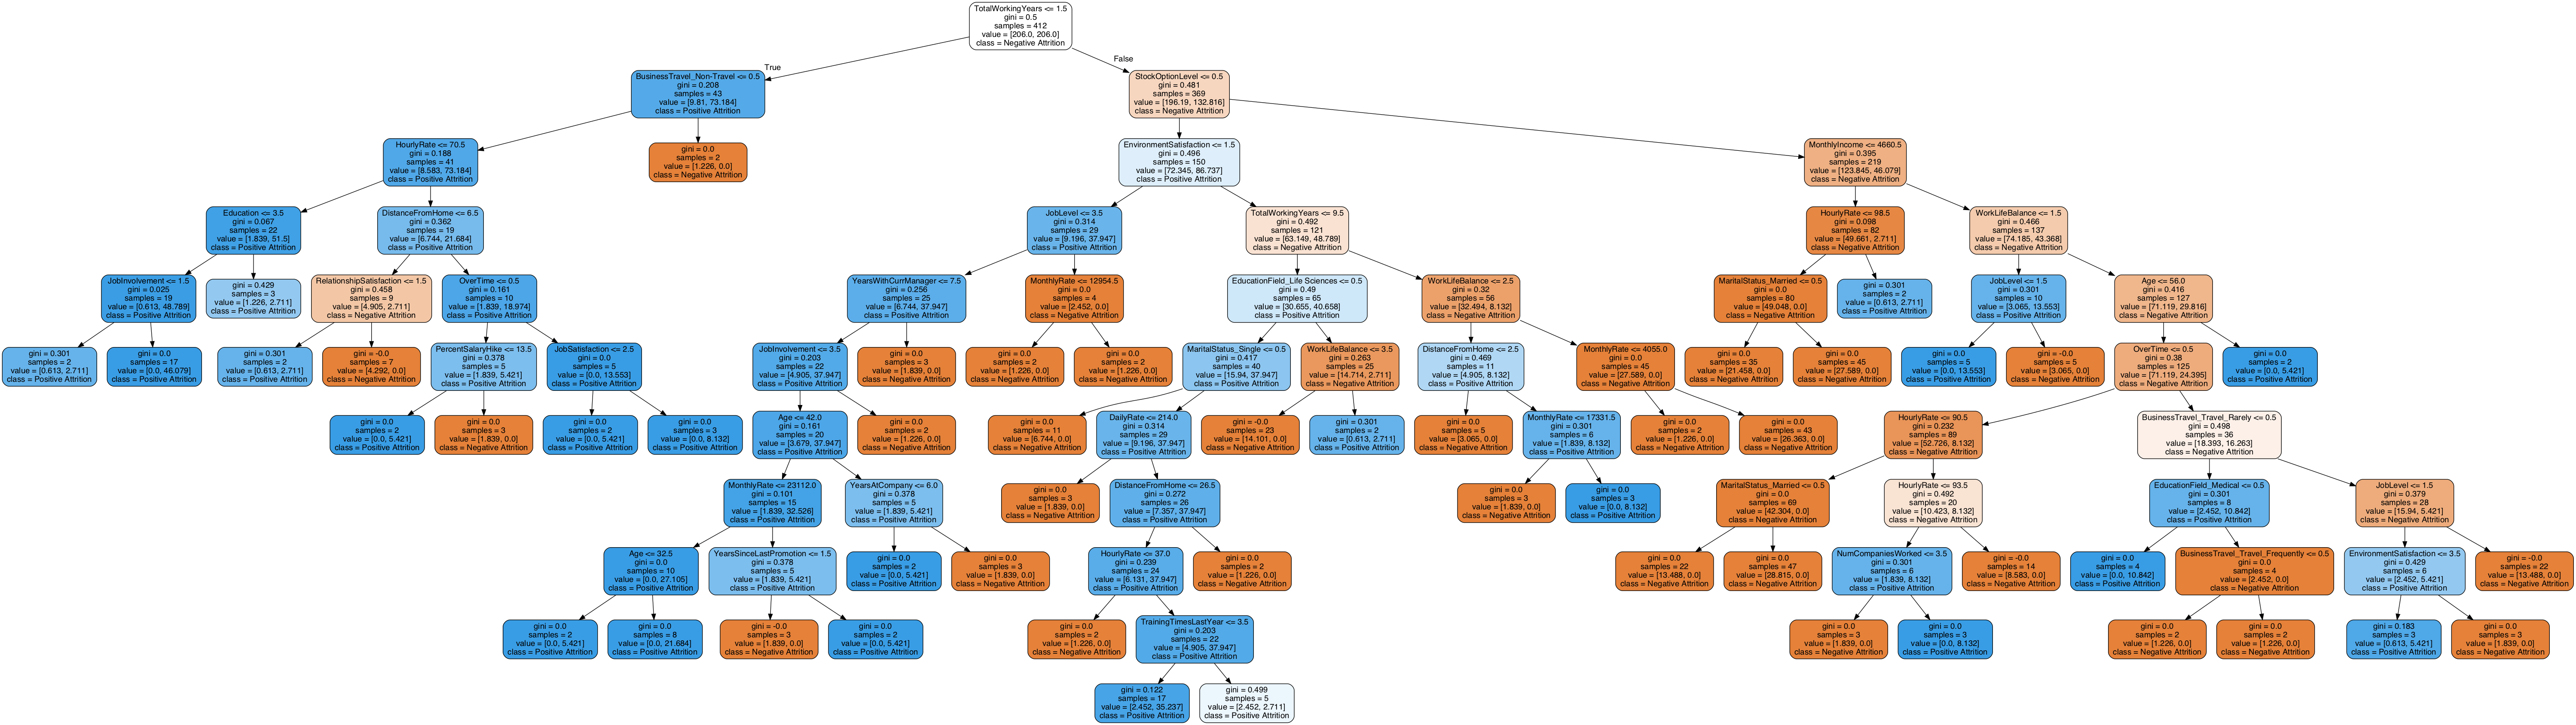

In [59]:
#visualize decision tree
from sklearn import tree
import pydotplus 
from IPython.display import Image  

dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(X_train.columns),  
                         class_names=['Negative Attrition' if x == 0 else 'Positive Attrition' for x in dt.classes_],  
                         filled=True, rounded=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Predict Attrition

In [62]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred, target_names=['No Attrition', 'Attrition']))
print('accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

No Attrition       0.84      0.74      0.79        93
   Attrition       0.25      0.38      0.30        21

    accuracy                           0.68       114
   macro avg       0.55      0.56      0.55       114
weighted avg       0.73      0.68      0.70       114

accuracy: 0.6754385964912281


[[69 24]
 [13  8]]


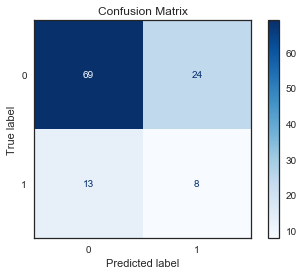

In [63]:
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')

disp = plot_confusion_matrix(dt,X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

### ROC Curve

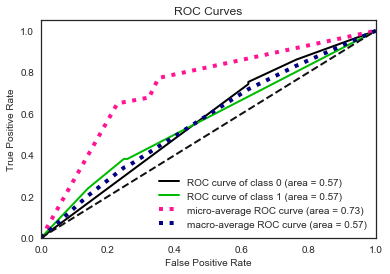

In [65]:
from scikitplot.metrics import plot_roc, plot_precision_recall
y_score = dt.predict_proba(X_test)

plot_roc(y_test, y_score)
plt.show()

#### Precision - Recall

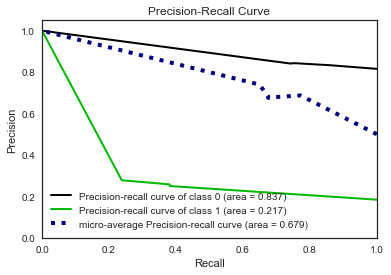

In [66]:
plot_precision_recall(y_test, y_score)
plt.show()

### POST-PRUNING WITH COST COMPLEXITY CONTROL (ALPHA REGULARIZATION)

Pruning is one of the techniques that is used to overcome our problem of Overfitting. Pruning, in its literal sense, is a practice which involves the selective removal of certain parts of a tree(or plant), such as branches, buds, or roots, to improve the tree’s structure, and promote healthy growth. This is exactly what Pruning does to our Decision Trees as well. It makes it versatile so that it can adapt if we feed any new kind of data to it, thereby fixing the problem of overfitting.

It reduces the size of a Decision Tree which might slightly increase your training error but drastically decrease your testing error, hence making it more adaptable.

Minimal Cost-Complexity Pruning is one of the types of Pruning of Decision Trees.

This algorithm is parameterized by α(≥0) known as the complexity parameter.

The complexity parameter is used to define the cost-complexity measure, Rα(T) of a given tree T: Rα(T)=R(T)+α|T|

where |T| is the number of terminal nodes in T and R(T) is traditionally defined as the total misclassification rate of the terminal nodes.

In its 0.22 version, Scikit-learn introduced this parameter called ccp_alpha (Yes! It’s short for Cost Complexity Pruning- Alpha) to Decision Trees which can be used to perform the same.



In [70]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.33)

In [71]:
#aplha pruning
path = dt.cost_complexity_pruning_path(X_tr,y_tr)
alphas = path['ccp_alphas']

alphas

array([0.00000000e+00, 5.92118946e-18, 5.22457894e-17, 3.43244148e-04,
       1.29242430e-03, 2.25685268e-03, 4.13223140e-03, 4.17073499e-03,
       5.30032653e-03, 5.70082092e-03, 6.05387418e-03, 6.32716130e-03,
       7.17955263e-03, 7.62229261e-03, 7.68449389e-03, 8.71950575e-03,
       9.38658657e-03, 1.10164512e-02, 1.10378322e-02, 1.17461038e-02,
       1.18597388e-02, 1.36121616e-02, 1.65880983e-02, 2.10582741e-02,
       2.10786574e-02, 3.57500853e-02, 4.28561037e-02, 9.75395852e-02])

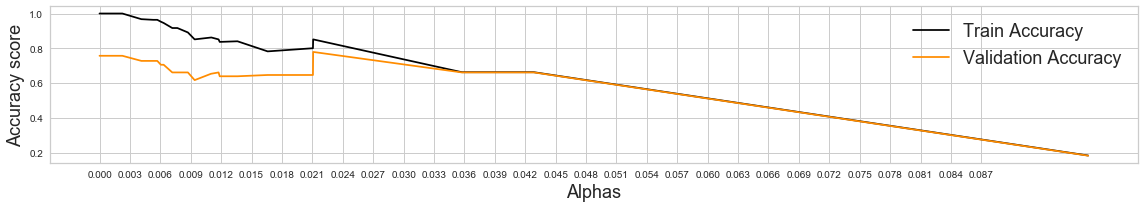

In [84]:
from sklearn.metrics import accuracy_score, precision_score
import seaborn as sns
sns.set_style('whitegrid')

accuracy_train, accuracy_validation = [],[]

for i in alphas:
    tree_ = DecisionTreeClassifier(random_state=42, criterion='gini',ccp_alpha=i, class_weight='balanced')
    
    tree_.fit(X_tr,y_tr)
    y_tr_pred = tree_.predict(X_tr)
    y_val_pred = tree_.predict(X_val)
    
    accuracy_train.append(accuracy_score(y_tr, y_tr_pred))
    accuracy_validation.append(accuracy_score(y_val, y_val_pred))
    

plt.figure(figsize=(16,3))
sns.lineplot(y=accuracy_train,x=alphas, label='Train Accuracy',color='black')
sns.lineplot(y=accuracy_validation,x=alphas, label='Validation Accuracy',color='darkorange')
plt.xticks(ticks=np.arange(0.00,0.09,0.003))
plt.xlabel('Alphas',fontsize=18)
plt.ylabel('Accuracy score',fontsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()



### Decision Tree: Pruned - alpha: 0.021

In [85]:
dt_f = DecisionTreeClassifier(criterion='gini', 
                                  random_state=42,
                                  ccp_alpha=0.021,
                                  class_weight='balanced')
dt_f = dt_f.fit(X_train, y_train)

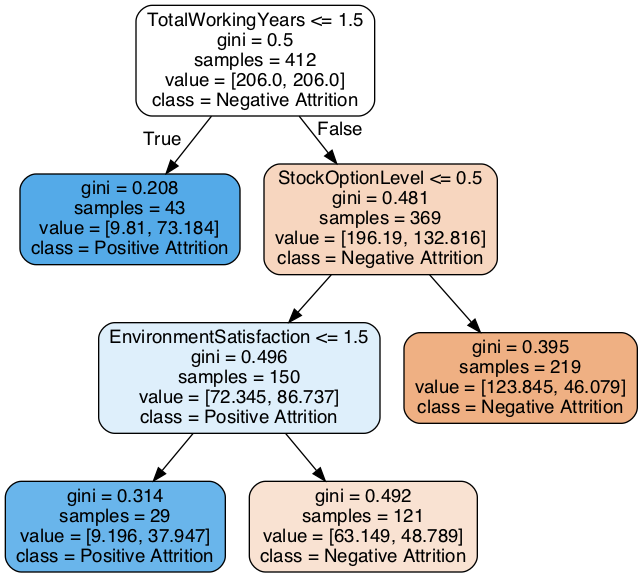

In [86]:
dot_data = tree.export_graphviz(dt_f, out_file=None, 
                         feature_names=list(X_train.columns),  
                         class_names=['Negative Attrition' if x == 0 else 'Positive Attrition' for x in dt_f.classes_],  
                         filled=True, rounded=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [87]:
y_pred = dt_f.predict(X_test)
print(classification_report(y_test,y_pred, target_names=['No Attrition', 'Attrition']))
print('accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

No Attrition       0.86      0.96      0.91        93
   Attrition       0.64      0.33      0.44        21

    accuracy                           0.84       114
   macro avg       0.75      0.65      0.67       114
weighted avg       0.82      0.84      0.82       114

accuracy: 0.8421052631578947


[[89  4]
 [14  7]]


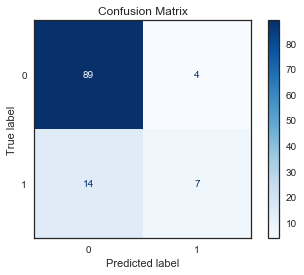

In [88]:
sns.set_style('white')
disp = plot_confusion_matrix(dt_f,X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

### ROC curve

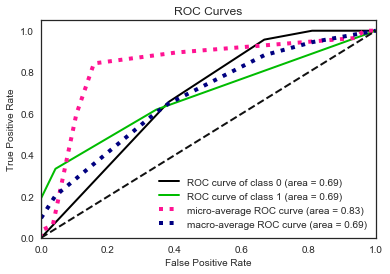

In [89]:
y_score = dt_f.predict_proba(X_test)

plot_roc(y_test, y_score)
plt.show()

### Precision - Recall

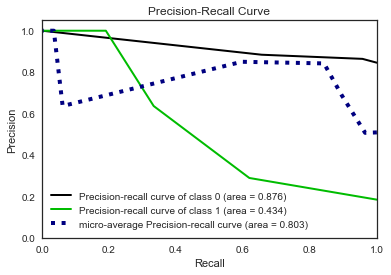

In [90]:
plot_precision_recall(y_test, y_score)
plt.show()

# 2. KNN

In [92]:
X_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationFiel

In [93]:
X_train = X_train[['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
         'MonthlyIncome', 'OverTime', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
         'TotalWorkingYears','RelationshipSatisfaction','StockOptionLevel', 'PercentSalaryHike','JobInvolvement']]

X_test = X_test[['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
         'MonthlyIncome', 'OverTime', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
         'TotalWorkingYears','RelationshipSatisfaction','StockOptionLevel', 'PercentSalaryHike','JobInvolvement']]


### Normalize the data

In [94]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Grid Search

In [95]:
from sklearn.neighbors import KNeighborsClassifier 

grid_params = {'n_neighbors': [x for x in range(3,20)],
              'weights': ['uniform','distance'],
              'metric':['euclidean','manhattan','minkowski']}

grid_serach= GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=5, n_jobs=-1)
gs_results=grid_serach.fit(X_train,y_train)
gs_results.cv_results_.keys()

print(gs_results.best_score_,gs_results.best_params_)



Fitting 5 folds for each of 102 candidates, totalling 510 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.5s


0.8422274463708492 {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:    5.2s finished


In [96]:
knn = KNeighborsClassifier(n_neighbors=6, metric='manhattan', weights = 'distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

In [98]:
y_pred = knn.predict(X_test)

In [99]:
print(classification_report(y_test,y_pred))
print('Accuracy test set', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        93
           1       0.62      0.24      0.34        21

    accuracy                           0.83       114
   macro avg       0.74      0.60      0.62       114
weighted avg       0.81      0.83      0.80       114

Accuracy test set 0.8333333333333334


[[90  3]
 [16  5]]


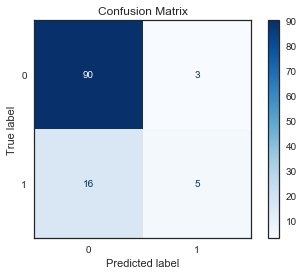

In [101]:
sns.set_style('white')
disp = plot_confusion_matrix(knn,X_test,y_test,
                            cmap = plt.cm.Blues)

disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

### ROC Curve

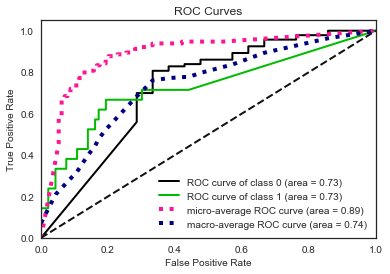

In [102]:
y_score = knn.predict_proba(X_test)

plot_roc(y_test, y_score)
plt.show()

### Precision - Recall

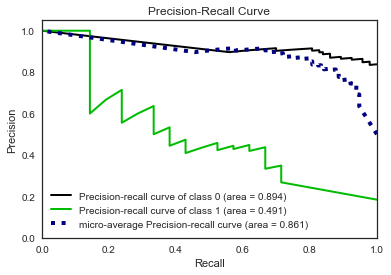

In [103]:
plot_precision_recall(y_test, y_score)
plt.show()